# Utility functions

In [1]:
import ocean_data_gateway as odg
import xarray as xr
import matplotlib.pyplot as plt

## Read in

### Model output

Let's say you have some model output:

In [2]:
url = 'https://gcoos5.geos.tamu.edu/thredds/dodsC/NcML/nowcast_agg.nc'
# url = 'http://barataria.geos.tamu.edu/thredds/dodsC/NcML/forecast_his_archive_agg.nc'
dsm = xr.open_dataset(url, chunks={'ocean_time': 1})

# add more cf-xarray info
dsm = dsm.cf.guess_coord_axis()

dsm

<xarray.Dataset>
Dimensions:         (eta_psi: 190, eta_rho: 191, eta_u: 191, eta_v: 190, ocean_time: 1019, s_rho: 30, s_w: 31, tracer: 6, xi_psi: 670, xi_rho: 671, xi_u: 670, xi_v: 671)
Coordinates:
  * s_rho           (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * s_w             (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.06667 -0.03333 0.0
    lon_rho         (eta_rho, xi_rho) float64 dask.array<chunksize=(191, 671), meta=np.ndarray>
    lat_rho         (eta_rho, xi_rho) float64 dask.array<chunksize=(191, 671), meta=np.ndarray>
    lon_u           (eta_u, xi_u) float64 dask.array<chunksize=(191, 670), meta=np.ndarray>
    lat_u           (eta_u, xi_u) float64 dask.array<chunksize=(191, 670), meta=np.ndarray>
    lon_v           (eta_v, xi_v) float64 dask.array<chunksize=(190, 671), meta=np.ndarray>
    lat_v           (eta_v, xi_v) float64 dask.array<chunksize=(190, 671), meta=np.ndarray>
    lon_psi         (eta_psi, xi_psi) float64 dask.array<chunksize=(190, 670), meta=np.ndarray>
    lat_psi         (eta_psi, xi_psi) float64 dask.array<chunksize=(190, 670), meta=np.ndarray>
  * ocean_time      (ocean_time) datetime64[ns] 2021-07-16 ... 2021-08-21
Dimensions without coordinates: eta_psi, eta_rho, eta_u, eta_v, tracer, xi_psi, xi_rho, xi_u, xi_v
Data variables: (12/101)
    ntimes          int32 ...
    ndtfast         int32 ...
    dt              float64 ...
    dtfast          float64 ...
    dstart          datetime64[ns] ...
    shuffle         int32 ...
    ...              ...
    Uwind           (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 191, 671), meta=np.ndarray>
    Vwind           (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 191, 671), meta=np.ndarray>
    shflux          (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 191, 671), meta=np.ndarray>
    ssflux          (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 191, 671), meta=np.ndarray>
    sustr           (ocean_time, eta_u, xi_u) float32 dask.array<chunksize=(1, 191, 670), meta=np.ndarray>
    svstr           (ocean_time, eta_v, xi_v) float32 dask.array<chunksize=(1, 190, 671), meta=np.ndarray>
Attributes: (12/36)
    file:                      /scratch/user/d.kobashi/projects/ROFS/projects...
    format:                    netCDF-4/HDF5 file
    Conventions:               CF-1.4, SGRID-0.3
    type:                      ROMS/TOMS history file
    title:                     TXLA Regional Ocean Forecast Sysetm (ROFS) wit...
    var_info:                  varinfo.dat
    ...                        ...
    tiling:                    010x012
    history:                   ROMS/TOMS, Version 3.7, Wednesday - August 18,...
    ana_file:                  /scratch/user/d.kobashi/source_code/COAWST/Fun...
    CPP_options:               TXLA2, ANA_BPFLUX, ANA_BSFLUX, ANA_BTFLUX, ANA...
    EXTRA_DIMENSION.N:         30
    EXTRA_DIMENSION.boundary:  4

### Data

In [7]:
dataset_id = 'noaa_nos_co_ops_8770822'
kwargs = {
          'approach': 'stations',
          'readers': [odg.erddap],
          'erddap': {
                          'known_server': 'ioos',
                           'dataset_ids': [[dataset_id]]
          },

}
data = odg.Gateway(**kwargs)
print(data.dataset_ids)
dsd = data['noaa_nos_co_ops_8770822']
dsd

['noaa_nos_co_ops_8770822']


<xarray.Dataset>
Dimensions:                                                               (time: 507546, timeseries: 1)
Coordinates:
    latitude                                                              (timeseries) float64 ...
    longitude                                                             (timeseries) float64 ...
  * time                                                                  (time) datetime64[ns] ...
Dimensions without coordinates: timeseries
Data variables: (12/13)
    station                                                               (timeseries) object ...
    rowSize                                                               (timeseries) int32 ...
    z                                                                     (time, timeseries) float64 ...
    air_pressure                                                          (time, timeseries) float64 ...
    sea_water_electrical_conductivity                                     (time, timeseries) float64 ...
    sea_water_practical_salinity                                          (time, timeseries) float64 ...
    ...                                                                    ...
    sea_water_temperature                                                 (time, timeseries) float64 ...
    sea_surface_height_amplitude_due_to_geocentric_ocean_tide_geoid_mllw  (time, timeseries) float64 ...
    sea_surface_height_above_sea_level_geoid_mllw                         (time, timeseries) float64 ...
    wind_speed_of_gust                                                    (time, timeseries) float64 ...
    wind_speed                                                            (time, timeseries) float64 ...
    wind_from_direction                                                   (time, timeseries) float64 ...
Attributes: (12/53)
    cdm_data_type:                 TimeSeries
    cdm_timeseries_variables:      station,longitude,latitude
    contributor_email:             None,feedback@axiomdatascience.com
    contributor_name:              Gulf of Mexico Coastal Ocean Observing Sys...
    contributor_role:              funder,processor
    contributor_role_vocabulary:   NERC
    ...                            ...
    standard_name_vocabulary:      CF Standard Name Table v72
    summary:                       Timeseries data from 'Texas Point, Sabine ...
    time_coverage_end:             2021-08-18T12:09:00Z
    time_coverage_start:           2015-09-03T15:42:00Z
    title:                         Texas Point, Sabine Pass
    Westernmost_Easting:           -93.8369

In [8]:
dsd.time

<xarray.DataArray 'time' (time: 507546)>
array(['2015-09-03T15:42:00.000000000', '2015-09-03T15:48:00.000000000',
       '2015-09-03T15:54:00.000000000', ..., '2021-08-18T08:30:00.000000000',
       '2021-08-18T08:36:00.000000000', '2021-08-18T12:09:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-09-03T15:42:00 ... 2021-08-18T12:09:00
Attributes:
    _CoordinateAxisType:  Time
    actual_range:         [1.44129492e+09 1.62928854e+09]
    axis:                 T
    ioos_category:        Time
    long_name:            Time
    standard_name:        time
    time_origin:          01-JAN-1970 00:00:00

## `resample_like`

Resample one Dataset to have the same times as another Dataset.

In [9]:
dsd_resampled = odg.utils.resample_like(dsd, dsm)
dsd_resampled.time

<xarray.DataArray 'time' (time: 52222)>
array(['2015-09-03T15:00:00.000000000', '2015-09-03T16:00:00.000000000',
       '2015-09-03T17:00:00.000000000', ..., '2021-08-18T10:00:00.000000000',
       '2021-08-18T11:00:00.000000000', '2021-08-18T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-09-03T15:00:00 ... 2021-08-18T12:00:00
Attributes:
    _CoordinateAxisType:  Time
    actual_range:         [1.44129492e+09 1.62928854e+09]
    axis:                 T
    ioos_category:        Time
    long_name:            Time
    standard_name:        time
    time_origin:          01-JAN-1970 00:00:00

The resampling looks correct!

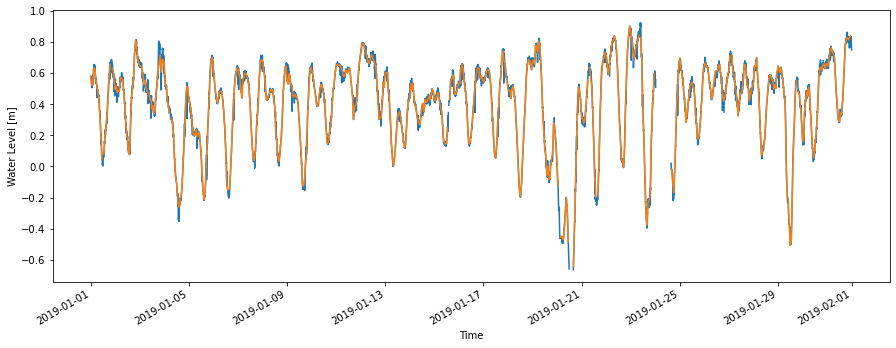

In [10]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
dsd.cf['ssh'].sel(time='2019-1').plot(ax=ax)
dsd_resampled.cf['ssh'].sel(time='2019-1').plot(ax=ax)